# Sample - thickness distribution

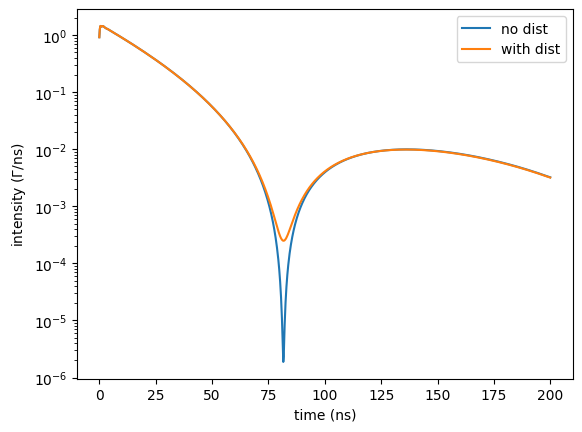

In [1]:
# import packages
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

layer_Fe = nx.Layer(id = "Fe",
                    material = nx.Material.Template(nx.lib.material.SS_enriched),
                    thickness = 3000,      # in nanometer
                    thickness_fwhm = 300)  # in nanometer

site = nx.Hyperfine()

layer_Fe.material.hyperfine_sites = [site]

sample = nx.Sample(layers = [layer_Fe])

beam  = nx.Beam()
beam.LinearSigma()

exp = nx.Experiment(beam = beam,
                    objects = [sample],
                    isotope = nx.moessbauer.Fe57)

time_spectrum = nx.TimeSpectrum(experiment = exp,
                                time_length = 200,
                                time_step = 0.2,
                                distribution_points = 1)  # no distribution used, the default value

time_axis, intensity = time_spectrum.Calculate()

plt.semilogy(time_axis, intensity, label='no dist')

# now with distribution
time_spectrum.distribution_points = 31

plt.semilogy(*time_spectrum.Calculate(), label='with dist')
plt.legend()
plt.xlabel('time (ns)')
plt.ylabel(r'intensity ($\Gamma$/ns)')
plt.show()